<a href="https://colab.research.google.com/github/TooBrokeForEvo/NLPCV_Assessment/blob/main/Assignment_3091801.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#Environment and Data Setup
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
from tensorflow.keras import layers
import time
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def prepare_sign_language_data(train_path, test_path):
  #Load the csv files.
  train_data = pd.read_csv(train_path)
  test_data = pd.read_csv(test_path)

  #separate labels and pixel values.
  y_train_raw = train_data['label'].values
  y_test_raw = test_data['label'].values
  X_train_raw = train_data.drop('label', axis=1).values
  X_test_raw = test_data.drop('label', axis=1).values

  #reshape to 28x28 grayscale tensors.
  X_train_raw = X_train_raw.reshape(-1, 28, 28, 1)
  X_test_raw = X_test_raw.reshape(-1, 28, 28, 1)

  #normalize pixel values.
  X_train_raw = X_train_raw / 255.0
  X_test_raw = X_test_raw / 255.0

  #convert the labels to one-hot format.
  lb = LabelBinarizer()
  y_train_raw = lb.fit_transform(y_train_raw)
  y_test_raw = lb.transform(y_test_raw)

  #Create a valdation split from the training set.
  X_train, X_val, y_train, y_val = train_test_split(
      X_train_raw, y_train_raw, test_size=0.2, random_state=42
  )

  print(f"Training sample: {X_train.shape[0]}")
  print(f"Validation samples: {X_val.shape[0]}")
  print(f"Test samples: {X_test_raw.shape[0]}")

  #return the split training data, validation data, and the test data.
  return X_train, X_val, X_test_raw, y_train, y_val, y_test_raw


def visualize_sample_data(X_data, y_data, index=0):
  #visualise
  plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
  one_hot_vector = y_data[index]
  label_index = np.argmax(one_hot_vector)
  plt.title(f"Sample Index: {index}, Label Index: {label_index}\nOne-Hot: {one_hot_vector}")
  plt.axis('off')
  plt.show()


In [21]:
def create_baseline_model():
  #Building the Baseline Model
  model = tf.keras.Sequential(
      [
        tf.keras.Input(shape=(28, 28, 1)),

        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(24, activation="softmax") #Must be 24 for the ASL alphabet
      ]
  )

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [22]:
def create_enhanced_model():
  #vgg
  model = models.Sequential([
      layers.Input(shape=(28, 28, 1)),

      layers.Conv2D(32, (3, 3), activation="relu", padding='same'),
      layers.Conv2D(32, (3, 3), activation="relu", padding='same'),
      layers.MaxPooling2D((2, 2)),

      layers.Conv2D(64, (3, 3), activation="relu", padding='same'),
      layers.Conv2D(64, (3, 3), activation="relu", padding='same'),
      layers.MaxPooling2D((2, 2)),

      layers.Conv2D(128, (3, 3), activation="relu", padding='same'),
      layers.Conv2D(128, (3, 3), activation="relu", padding='same'),
      layers.MaxPooling2D((2, 2)),

      layers.Flatten(),
      layers.Dropout(0.5), #Regularization to prevent overfitting [cite: 32]
      layers.Dense(128, activation="relu"),
      layers.Dense(24, activation="softmax")
  ])

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [23]:
def train_and_evalute_model(model, model_name, X_train, y_train, X_val, y_val, X_test, y_test):
  print(f"Starting Experiment: {model_name}")
  start_time = time.time()
  history = model.fit(
      X_train,
      y_train,
      batch_size=32,
      epochs=10,
      validation_data=(X_val, y_val),
  )
  training_time = time.time() - start_time

  print(f"n{model_name} Training Time: {training_time:.2f} seconds")
  print(f"{model_name} Parameter Count: {model.count_params():,}")

  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], label='Train Acc')
  plt.plot(history.history['val_accuracy'], label='Val Acc')
  plt.title(f'{model_name} Accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Val Loss')
  plt.title(f'{model_name} Loss')
  plt.legend()
  plt.show()

  y_pred = model.predict(X_test)
  y_pred_classes = np.argmax(y_pred, axis=1)
  y_true_classes = np.argmax(y_test, axis=1)

  print(f"\n{model_name} Classification Report:\n")
  print(classification_report(y_true_classes, y_pred_classes))

  plt.figure(figsize=(12, 10))
  cm = confusion_matrix(y_true_classes, y_pred_classes)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.title(f'{model_name} Confusion Matrix')
  plt.show()

  return history, training_time


Archive:  drive/MyDrive/archive.zip
replace amer_sign2.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  
Training sample: 21964
Validation samples: 5491
Test samples: 7172


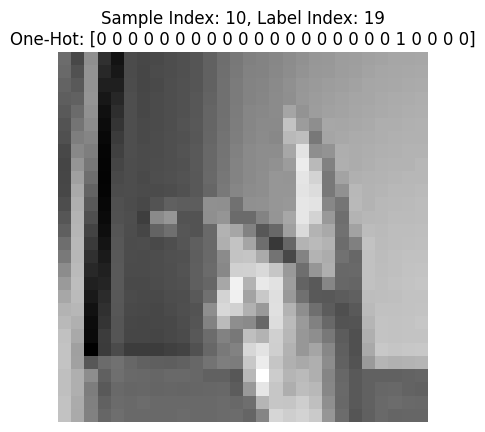

Starting Experiment: Baseline Model
Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5664 - loss: 1.5405 - val_accuracy: 0.9987 - val_loss: 0.0315
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9984 - loss: 0.0200 - val_accuracy: 0.9998 - val_loss: 0.0045
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9995 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 8.9806e-04 - val_accuracy: 1.0000 - val_loss: 6.1758e-04
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 3.9079e-04 - val_accuracy: 1.0000 - val_loss: 4.7015e-04
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 1.0000 - loss: 2.7134e-04 - val_accuracy: 1.0000 - val_loss: 2.4630e-04
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 1.4219e-04 - val_accuracy: 1.0000 - val_loss: 1.6712e-04
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━

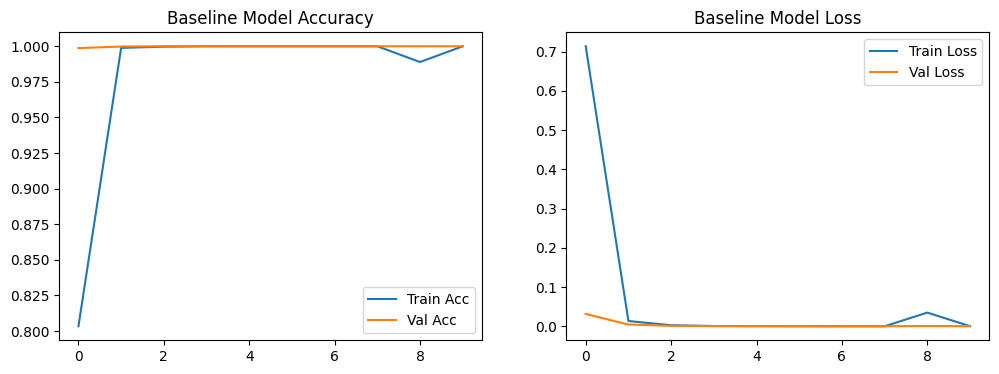

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

Baseline Model Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       331
           1       1.00      0.95      0.98       432
           2       0.94      1.00      0.97       310
           3       1.00      0.88      0.94       245
           4       0.96      0.96      0.96       498
           5       0.87      1.00      0.93       247
           6       0.94      0.89      0.91       348
           7       0.78      0.95      0.86       436
           8       0.87      0.75      0.81       288
           9       0.78      0.83      0.81       331
          10       0.89      0.81      0.85       209
          11       0.91      0.87      0.89       394
          12       0.81      0.68      0.74       291
          13       0.84      0.67      0.75       246
          14       0.99      1.00      0.99       347
          15       0.93      0.89      0.91       164


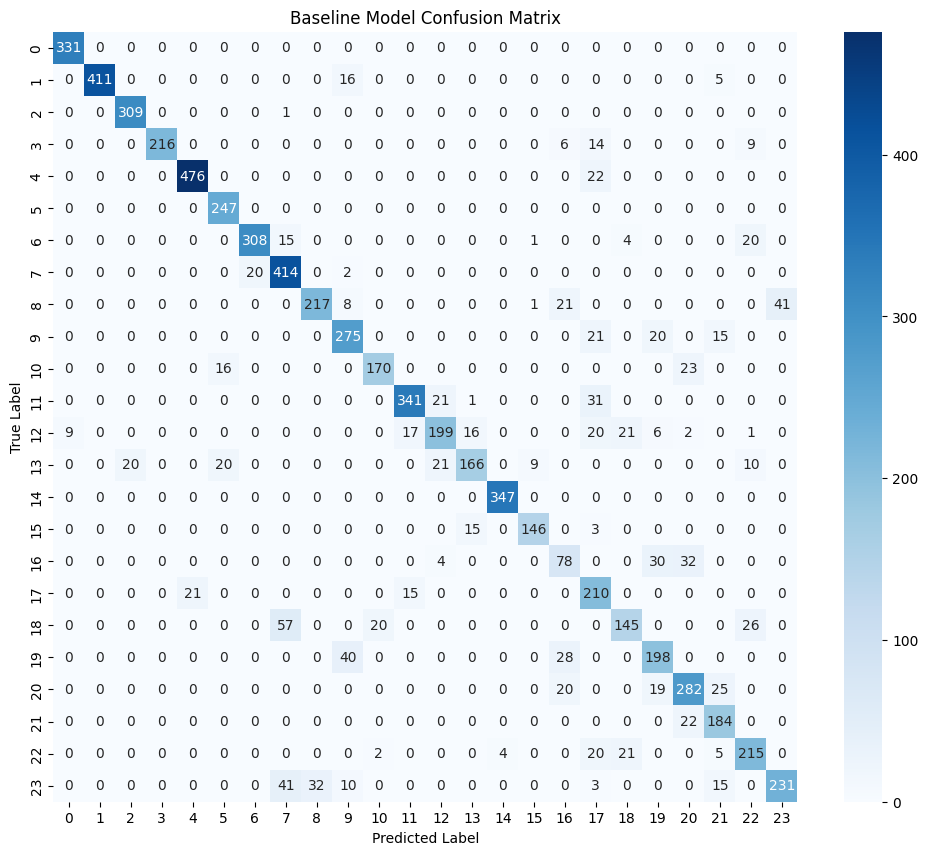

Starting Experiment: Enhanced Model
Epoch 1/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.3852 - loss: 2.0004 - val_accuracy: 0.9834 - val_loss: 0.0673
Epoch 2/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9653 - loss: 0.1013 - val_accuracy: 0.9989 - val_loss: 0.0046
Epoch 3/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9847 - loss: 0.0485 - val_accuracy: 0.9995 - val_loss: 0.0021
Epoch 4/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9890 - loss: 0.0323 - val_accuracy: 0.9991 - val_loss: 0.0023
Epoch 5/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9911 - loss: 0.0283 - val_accuracy: 1.0000 - val_loss: 2.4455e-04
Epoch 6/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9938 - loss: 0.0201 - val_accuracy: 1.0000 - val_loss: 2.3188e-04
Epoch 7/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9915 - loss: 0.0247 - val_accuracy: 1.0000 - val_loss: 7.6658e-04
Epoch 8/10
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - 

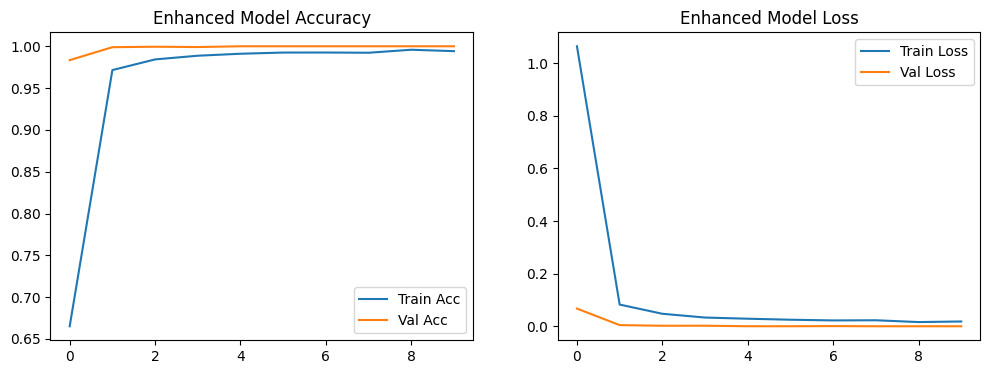

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Enhanced Model Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       331
           1       1.00      0.94      0.97       432
           2       1.00      1.00      1.00       310
           3       0.97      1.00      0.98       245
           4       1.00      1.00      1.00       498
           5       1.00      1.00      1.00       247
           6       0.94      0.94      0.94       348
           7       1.00      0.91      0.95       436
           8       1.00      1.00      1.00       288
           9       1.00      1.00      1.00       331
          10       0.99      1.00      0.99       209
          11       1.00      1.00      1.00       394
          12       1.00      0.96      0.98       291
          13       1.00      1.00      1.00       246
          14       1.00      0.94      0.97       347
          15       0.93      1.00      0.96       164


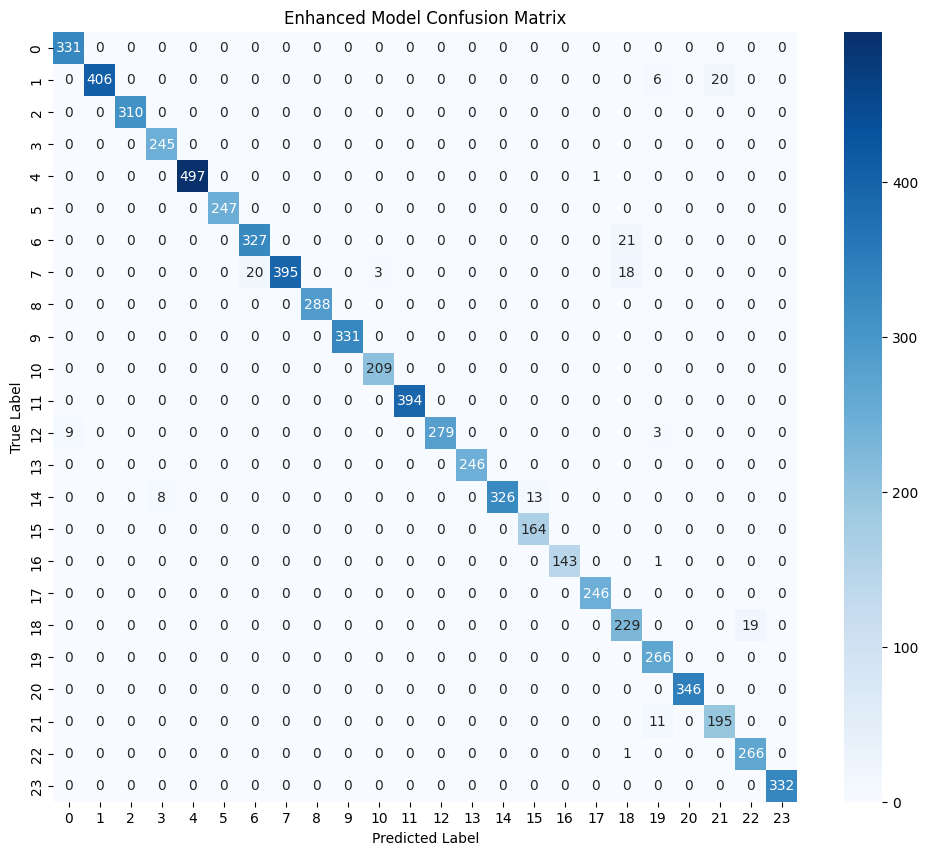

In [24]:
!unzip "drive/MyDrive/archive.zip"
train_path = 'sign_mnist_train/sign_mnist_train.csv'
test_path = 'sign_mnist_test/sign_mnist_test.csv'

X_train, X_val, X_test_raw, y_train, y_val, y_test_raw = prepare_sign_language_data(train_path, test_path)

visualize_sample_data(X_train, y_train, index=10)

model_baseline = create_baseline_model()
model_enhanced = create_enhanced_model()

history_baseline, training_time_baseline = train_and_evalute_model(
    model_baseline, 'Baseline Model', X_train, y_train, X_val, y_val, X_test_raw, y_test_raw
)

history_enhanced, training_time_enhanced = train_and_evalute_model(
    model_enhanced, 'Enhanced Model', X_train, y_train, X_val, y_val, X_test_raw, y_test_raw
)





225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Total Errors in Enhanced Model: 154 out of 7172


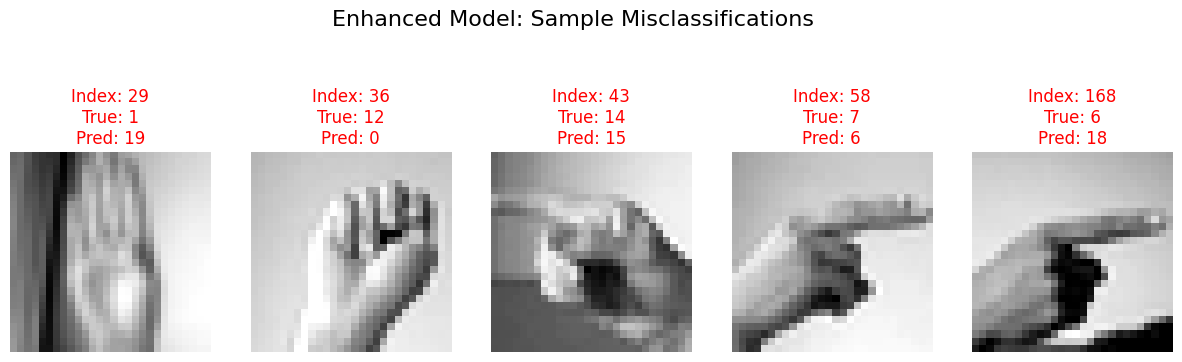

In [25]:
y_pred_probs = model_enhanced.predict(X_test_raw)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_raw, axis=1)

error_indices = np.where(y_pred_classes != y_true_classes)[0]

print(f"Total Errors in Enhanced Model: {len(error_indices)} out of {len(y_test_raw)}")

if len(error_indices) > 0:
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(error_indices[:5]):
        img = X_test_raw[idx].reshape(28, 28)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(f"Index: {idx}\nTrue: {y_true_classes[idx]}\nPred: {y_pred_classes[idx]}", color='red')
        plt.axis('off')
    plt.suptitle("Enhanced Model: Sample Misclassifications", fontsize=16)
    plt.show()
else:
    print("No errors found!")